# Introduction

Check the [documentation](https://joserapa98.github.io/tensorkrowch/_build/html/index.html)!

To run this locally, use a conda/venv environment:

- Create environment: conda create -n tutorial_tk python=3.12
- Activate environment: conda activate tutorial_tk
- Install packages:
    - pip install torch torchvision
    - pip install ipykernel
    - pip install numpy (optional)
    - pip install matplotlib (optional)
    - pip install tensorkrowch

For Google Colab:

In [ ]:
%pip install tensorkrowch

In [7]:
%mkdir data
%mkdir models

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import numpy as np
import matplotlib.pyplot as plt
from math import log

import tensorkrowch as tk

In [4]:
torch.__version__

'2.2.2+cu121'

In [5]:
tk.__version__

'1.1.1'

In [6]:
device = torch.device('cpu')

if torch.cuda.is_available():
    device = torch.device('cuda:0')
elif torch.backends.mps.is_available():
    device = torch.device('mps:0')
else:
    device = torch.device('cpu')

device

device(type='cuda', index=0)

In [8]:
!nvidia-smi

Fri May  3 11:22:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P5              27W /  80W |    450MiB /  8192MiB |     27%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Tensor basics

Create tensors

---

In [ ]:
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]],
                         dtype=torch.float32,
                         device=device)
my_tensor

In [ ]:
x = torch.empty(2, 2)
print(x)

x = torch.zeros(3, 3)
print(x)

x = torch.ones(4, 5)
print(x)

x = torch.eye(2, 4)
print(x)

x = torch.rand(2, 3)
print(x)

x = torch.randn(3, 3)
print(x)

In [ ]:
x = torch.randn(2, 3, 4)
print(x.device)
print(x.dtype)
print()

x = x.to('cuda')       # x.cuda()
x = x.to(torch.int32)  # x.int()
print(x.device)
print(x.dtype)

# x.bool()
# x.short()
# x.long()
# x.half()
# x.float()
# x.double()

In [ ]:
np_array = np.zeros((3, 3))
print(np_array)

tensor = torch.from_numpy(np_array)
print(tensor)

np_array_back = tensor.numpy()
print(np_array_back)

Change view of tensors

---

In [ ]:
x = torch.randn(2, 3, 4)
x.shape

In [ ]:
print(x.view(6, 4).shape)
print(x.view(2, 1, 3, 1, 4).shape)
print(x.view(-1).shape)
print(x.view(-1, 4).shape)

In [ ]:
y = x.permute(1, 0, 2)
print(y.shape)

print(x.is_contiguous())
print(y.is_contiguous())

try:
    y = y.view(6, 4)
except:
    print('It failed')
    y = y.contiguous().view(6, 4)   
print(y.shape)

In [ ]:
y.reshape(2, 3, 4).shape

Tensor indexing

---

In [ ]:
batch_size = 10
features = 25
x = torch.rand(batch_size, features)

print(x[0].shape)   # x[0, :]
print(x[:, 0].shape)

print(x[2, 0:10])

x[0, 0] = 100
x[0, 1:3] = 20
print(x[0, 0:10])

x[0, :] = torch.arange(0, 25)
print(x[0])

In [ ]:
x = torch.arange(10)
indices = [2, 5, 8]
print(x[indices])

In [ ]:
x = torch.rand(3, 5)
rows = torch.tensor([1, 0])
cols = torch.tensor([4, 0])
print(x, x[rows, cols])

In [ ]:
x = torch.arange(10)
print(x[(x < 2) | (x > 8)])
print(x[(x < 2) & (x > 8)])
print(x[x.remainder(2) == 0])

print(torch.where(x > 5, x, x * 2))
print(torch.tensor([0, 0, 1, 2, 2, 3, 4]).unique())
print(x.ndimension()) # 5x5x5 -> 3
print(x.numel()) # number of elements

Concat / stack

---

In [ ]:
x1 = torch.randn(3, 3)
x2 = torch.randn(3, 3)
print(x1)
print(x2)

x3 = torch.cat([x1, x2], dim=0)
print(x3, x3.shape)

In [ ]:
x3 = torch.stack([x1, x2], dim=0)
print(x3, x3.shape)

Some operations

---

In [ ]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([9, 8, 7])

In [ ]:
# Addition
z1 = torch.empty(3)
print(z1)
torch.add(x, y, out=z1)
print(z1)

z2 = torch.add(x, y)
print(z2)

z = x + y
print(z)

# Subtraction
z = x - y
print(z)

# Division
z = torch.true_divide(x, y) # element-wise division
print(z)

# In-place operations
# Any operation followed by underscore means inplace operation
# (does not create new tensor, just replaces t)
t = torch.zeros(3)
print(t)
t.add_(x)
print(t)

t = t + x # Not in-place
t += x # In-place

# Exponentiation
z = x.pow(2)
print(z)

z = x ** 2
print(z)

# Comparison
z = x > 0
print(z)

In [ ]:
# Element-wise multiplication
z = x * y
print(z)

# Dot product
z = torch.dot(x, y)
print(z)
print(x.dot(y))

In [ ]:
# Matrix multiplication
x1 = torch.rand(2, 5)
x2 = torch.rand(5, 3)

x3 = torch.mm(x1, x2)
print(x3)
x3 = x1.mm(x2)
print(x3)


# Batch matrix multiplication
batch = 32
n = 10
m = 20
p = 30

tensor1 = torch.rand(batch, n, m)
tensor2 = torch.rand(batch, m, p)
out = torch.bmm(tensor1, tensor2) # (batch, n, p)
print(out.shape)

In [ ]:
# Einsum
x = torch.randn(2, 3, 4)
y = torch.randn(2, 7, 1, 4)
z = torch.einsum('bmn,bijn->bmi', x, y)
print(z.shape)

*Trainable* tensors

---

In [ ]:
x = torch.randn(2, 3, requires_grad=True)
x

In [ ]:
print(x.sum())
print(x.grad)

In [ ]:
x.sum().backward()
print(x.grad)

In [ ]:
x = nn.Parameter(torch.randn(2, 3))
x

# Datasets

In [9]:
# Bars and stripes dataset
dataset_name = 'bars_stripes'
batch_size = 64
sq_root_size = 5
input_size = sq_root_size ** 2
dataset_size = int(1e4)
num_classes = 2

# Create dataset
def create_dataset(size, sq_root_size):
    tensors = []
    labels = []
    for _ in range(size):
        while True:
            t = torch.randint(low=0, high=2, size=(1, sq_root_size))  # stripes
            t = t.expand(sq_root_size, -1)
            if not torch.equal(t, torch.zeros_like(t)) \
                and not torch.equal(t, torch.ones_like(t)):
                    break
        
        if torch.rand(1) < 0.5:
            # stripes
            tensors.append(t)
            labels.append(1)
            
        else:
            # bars
            tensors.append(t.t())
            labels.append(0)
    
    tensors = torch.stack(tensors, dim=0).view(size,
                                               1,
                                               sq_root_size,
                                               sq_root_size)
    labels = torch.Tensor(labels).long()
    
    return tensors.float(), labels

dataset = create_dataset(dataset_size, sq_root_size)

# Load dataset
train_dataset = TensorDataset(dataset[0][:int(0.8 * dataset_size)],
                              dataset[1][:int(0.8 * dataset_size)])
test_dataset = TensorDataset(dataset[0][int(0.8 * dataset_size):],
                             dataset[1][int(0.8 * dataset_size):])

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [10]:
# MNIST Dataset
dataset_name = 'mnist'
batch_size = 64
input_size = 28 * 28  # 784
num_classes = 10

# Load data
train_dataset = datasets.MNIST(root='data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='data/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# FashionMNIST Dataset
dataset_name = 'fashion_mnist'
batch_size = 64
input_size = 28 * 28  # 784
num_classes = 10

# Load data
train_dataset = datasets.FashionMNIST(root='data/',
                                      train=True,
                                      transform=transforms.ToTensor(),
                                      download=True)
test_dataset = datasets.FashionMNIST(root='data/',
                                     train=False,
                                     transform=transforms.ToTensor(),
                                     download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [11]:
len(train_dataset)

60000

In [12]:
len(train_dataset[0])

2

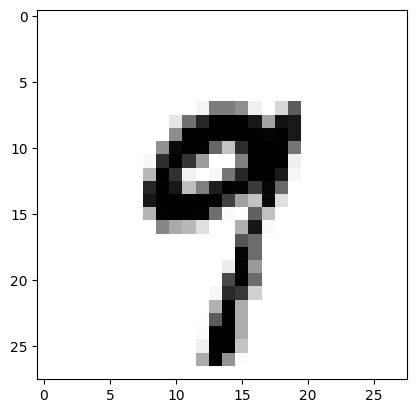

9


In [13]:
random_sample = torch.randint(low=0, high=len(train_dataset), size=(1,)).item()

plt.imshow(train_dataset[random_sample][0].squeeze(0), cmap='Greys')
plt.show()

print(train_dataset[random_sample][1])

# Training a Neural Network

Components of Neural Networks

---

In [ ]:
# Linear layer
linear = nn.Linear(10, 30)
print(linear.weight.shape, linear.bias.shape)

x = torch.randn(100, 10)
result1 = x @ linear.weight.t() + linear.bias
result2 = linear(x)

print(result1.shape, result2.shape)
print((result1 - result2).norm().item())

In [ ]:
# Convolutional layer
conv = nn.Conv2d(5, 10, kernel_size=3, stride=3, padding=0)
print(conv.weight.shape, conv.bias.shape)

x = torch.randn(100, 5, 9, 9)
result1 = conv(x)

aux_x = torch.randn(100, 9, 5, 3, 3)
result2 = torch.einsum('bncwh,ocwh->bon', aux_x, conv.weight)
result2 = result2.reshape(100, 10, 3, 3)
result2 = result2 + conv.bias.view(1, -1, 1, 1)

print(result1.shape, result2.shape)

In [ ]:
# Activations
sigmoid = nn.Sigmoid()
print(sigmoid(torch.tensor([1e-5, 1e-1, 0.5, 1e1, 1e5])))

relu = nn.ReLU()
print(relu(torch.tensor([1., 4., -3, 5., -1])))

softmax = nn.Softmax(dim=0)
print(softmax(torch.tensor([1e-5, -2e1, 4e-1])))

Neural Network model

---

In [ ]:
class FFFC(nn.Module):  # Feed forward fully connected
    
    def __init__(self, input_size, num_classes):
        # Here we define the elements and structure of the Neural Network
        
        super().__init__() # super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        self.relu = nn.ReLU()
        
        # We could add other custom parameters
        # self.my_param = nn.Parameter(torch.randn(10))
        
    def forward(self, x):
        # Here we specify how the components of the NN are combined to
        # return a certain output
        
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Initialize network
model = FFFC(input_size=input_size, num_classes=num_classes)
model = model.to(device)

In [ ]:
for name, p in model.named_parameters():
    print(name, p.shape)

Training loop

---

In [ ]:
# Hyperparameters
learning_rate = 1e-3
weight_decay = 1e-5
num_epochs = 5
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        
        # Forward
        scores = model(data)
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, model)
    test_acc = check_accuracy(test_loader, model)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

torch.save(model.state_dict(), f'models/fffc_{dataset_name}.pt')

In [ ]:
def n_params(model):
    n = 0
    for p in model.parameters():
        n += p.numel()
    return n

n = n_params(model)
test_acc = check_accuracy(test_loader, model)
test_acc, n

# Basics of TensorKrowch

## Nodes

In [ ]:
node = tk.Node(shape=(2, 5, 2))
node

In [ ]:
# Inititalize with tensor
tensor = torch.randn(2, 5, 2)
node = tk.Node(tensor=tensor)

# Inititalize with init_method
node = tk.Node(shape=(2, 5, 2),
               init_method='randn')

node = tk.randn(shape=(2, 5, 2),
                axes_names=('left', 'input', 'right'))

In [ ]:
print(node.shape)   # Returns node's shape
print(node.tensor)  # Returns node's tensor
print(node.axes)    # Returns node's axes

## TensorNetwork

In [ ]:
net = tk.TensorNetwork(name='my_network')
net

In [ ]:
isinstance(net, nn.Module)

In [ ]:
node1 = tk.Node(shape=(100, 2, 5, 2),
                name='my_node',
                axes_names=('batch', 'left', 'input', 'right'),
                network=net)
node1

In [ ]:
net

In [ ]:
node2 = tk.Node(shape=(100, 2, 5, 2),
                name='other_node',
                axes_names=('batch', 'left', 'input', 'right'),
                network=net)
net

## Connecting nodes

In [ ]:
node1['right']

In [ ]:
print(node1['right'].is_dangling())  # Indicates if the edge is not connected
print(node1['batch'].is_batch())     # Indicates if the edge is a batch edge

print(node1['input'].size())         # Returns the shape of the node in that axis

In [ ]:
node1['right'] ^ node2['left']

In [ ]:
net

In [ ]:
node1['right'] | node2['left']  # node1['right'].disconnect()

In [ ]:
net

In [ ]:
mps = tk.TensorNetwork(name='mps')

for i in range(100):
    _ = tk.randn(shape=(2, 5, 2),
                 axes_names=('left', 'input', 'right'),
                 name=f'node_({i})',
                 network=mps)

for i in range(100):
    mps[f'node_({i})']['right'] ^ mps[f'node_({(i + 1) % 100})']['left']

In [ ]:
mps.nodes.keys()

## *Trainable* nodes

In [ ]:
paramnode1 = tk.ParamNode(shape=(2, 5, 2))     # Empty paramnode
paramnode2 = tk.ParamNode(shape=(2, 5, 2),
                          init_method='randn')
paramnode3 = tk.randn(shape=(2, 5, 2),
                      param_node=True)  # Indicates if node is ParamNode

In [ ]:
tensor = torch.randn(2, 5, 2)
paramnode = tk.ParamNode(tensor=tensor,
                         name='my_paramnode')

isinstance(paramnode.tensor, nn.Parameter)

In [ ]:
for n, p in paramnode.network.named_parameters():
    print(n, p)

In [ ]:
node = paramnode.parameterize(False)
assert isinstance(node.tensor, torch.Tensor)
assert not isinstance(node.tensor, nn.Parameter)

print('Node in parameters?')
for n, p in node.network.named_parameters():
    print(n, p)

paramnode = node.parameterize()
assert isinstance(paramnode.tensor, nn.Parameter)

print('Node in parameters?')
for n, p in paramnode.network.named_parameters():
    print(n, p)

In [ ]:
sum = paramnode.sum()  # Sums over all axes of the node
sum.backward()         # Differentiates sum with respect to paramnode

In [ ]:
paramnode.grad

## Tensor-like operations

In [ ]:
node1 = tk.randn(shape=(2, 3),
                 axes_names=('left', 'right'))
node2 = tk.randn(shape=(2, 3),
                 axes_names=('left', 'right'))
node2.move_to_network(node1.network)

In [ ]:
# Multiplication
node3 = node1 * node2

# Division
node4 = node1 / node2

# Addition
node5 = node1 + node2

# Subtraction
node6 = node1 - node2

In [ ]:
# Renormalize
node7 = node1.renormalize()
node1.norm(), node7.norm()

In [ ]:
node1.network

In [ ]:
node1.network.resultant_nodes

## Node-like operations

In [ ]:
# contract_between
node1 = tk.randn(shape=(100, 2, 3),
                 axes_names=('batch', 'left', 'right'))
node2 = tk.randn(shape=(100, 3, 4),
                 axes_names=('batch', 'left', 'right'))

assert node1.network != node2.network
# node2.move_to_network(node1.network)

node1['right'] ^ node2['left']

assert node1.network == node2.network

result = node1 @ node2
result.shape

In [ ]:
# split
node = tk.randn(shape=(2, 3, 4, 5),
                axes_names=('left1', 'left2', 'right1', 'right2'))
res1, res2 = node.split(['left1', 'right1'],
                        ['left2', 'right2'],
                        rank=2)

print(res1.shape, res2.shape)

In [ ]:
# stack
net = tk.TensorNetwork()
nodes = []

for i in range(100):
    node = tk.randn(shape=(2, 5, 2),
                    axes_names=('left', 'input', 'right'),
                    network=net,
                    name=f'node_({i})')
    nodes.append(node)

stack_node = tk.stack(nodes)
print(stack_node.shape)

stack_node['stack'].is_batch()

In [ ]:
# Stacks need to be reconnected
net = tk.TensorNetwork()
nodes = []
data_nodes = []

for i in range(100):
    node = tk.randn(shape=(2, 5, 2),
                    axes_names=('left', 'input', 'right'),
                    network=net,
                    name=f'node_({i})')
    nodes.append(node)

    data_node = tk.randn(shape=(100, 5),
                    axes_names=('batch', 'feature'),
                    network=net,
                    name=f'data_node_({i})')
    data_nodes.append(data_node)

    node['input'] ^ data_node['feature']

stack_node = tk.stack(nodes)
stack_data_node = tk.stack(data_nodes)

print(stack_node.is_connected_to(stack_data_node))

# reconnect stacks
stack_node ^ stack_data_node

print(stack_node.is_connected_to(stack_data_node))

In [ ]:
# unbind
net = tk.TensorNetwork()
nodes = []

for i in range(100):
    node = tk.randn(shape=(2, 5, 2),
                    axes_names=('left', 'input', 'right'),
                    network=net,
                    name=f'node_({i})')
    nodes.append(node)

stack_node = tk.stack(nodes)
unbound_nodes = tk.unbind(stack_node)  # stack_node.unbind()

len(unbound_nodes), unbound_nodes[0].shape

In [ ]:
# einsum
node1 = tk.randn(shape=(10, 15, 100),
                 axes_names=('left', 'right', 'batch'))
node2 = tk.randn(shape=(15, 7, 100),
                 axes_names=('left', 'right', 'batch'))
node3 = tk.randn(shape=(7, 10, 100),
                 axes_names=('left', 'right', 'batch'))

node1['right'] ^ node2['left']
node2['right'] ^ node3['left']
node3['right'] ^ node1['left']

result = tk.einsum('ijb,jkb,kib->b', node1, node2, node3)
result.shape

With these operations, we can contract the whole tensor network:

In [ ]:
mps = tk.TensorNetwork(name='mps')
nodes = []
data_nodes = []

for i in range(100):
    node = tk.randn(shape=(2, 5, 2),
                    axes_names=('left', 'input', 'right'),
                    network=mps,
                    name=f'node_({i})',
                    param_node=True)
    nodes.append(node)

    data_node = tk.randn(shape=(5,),
                         axes_names=('feature',),
                         network=mps,
                         data=True,
                         name=f'data_node_({i})')
    data_nodes.append(data_node)

    node['input'] ^ data_node['feature']

for i in range(100):
    mps[f'node_({i})']['right'] ^ mps[f'node_({(i + 1) % 100})']['left']

In [ ]:
mps.data_nodes.keys()

In [ ]:
stack_node = tk.stack(nodes)
stack_data_node = tk.stack(data_nodes)

stack_node ^ stack_data_node

stack_result = stack_node @ stack_data_node
unbind_result = tk.unbind(stack_result)

In [ ]:
result = unbind_result[0]
for node in unbind_result[1:]:
    result @= node

result.shape

In [ ]:
result.tensor.backward()

for node in nodes:
    assert node.grad is not None

In [ ]:
mps.resultant_nodes.keys()

In [ ]:
mps.unset_data_nodes()
mps.data_nodes.keys()

In [ ]:
mps.reset()
mps.resultant_nodes.keys()

## Creating the first TensorNetwork

In [ ]:
class MPS(tk.TensorNetwork):

    def __init__(self,
                 input_size,
                 input_dim,
                 output_dim,
                 bond_dim,
                 uniform=False):
        """
        In the __init__ method we define the tensor network
        structure and initialize all the nodes
        """
        super().__init__(name='mps')

        #############
        # Create TN #
        #############
        input_nodes = []

        # Number of input nodes equal to number of features
        for _ in range(input_size):
            node = tk.ParamNode(shape=(bond_dim, input_dim, bond_dim),
                                axes_names=('left', 'input', 'right'),
                                name='input_node',
                                network=self)
            input_nodes.append(node)

        for i in range(len(input_nodes) - 1):
            input_nodes[i]['right'] ^ input_nodes[i + 1]['left']

        # Output node is in the last position,
        # but that could be changed
        output_node = tk.ParamNode(shape=(bond_dim, output_dim, bond_dim),
                                   axes_names=(
                                       'left', 'output', 'right'),
                                   name='output_node',
                                   network=self)
        output_node['right'] ^ input_nodes[0]['left']
        output_node['left'] ^ input_nodes[-1]['right']

        self.input_nodes = input_nodes
        self.output_node = output_node

        # If desired, the MPS can be uniform
        if uniform:
            uniform_memory = tk.ParamNode(shape=(bond_dim, input_dim, bond_dim),
                                          axes_names=(
                                              'left', 'input', 'right'),
                                          name='virtual_uniform',
                                          network=self,
                                          virtual=True)
            self.uniform_memory = uniform_memory

        ####################
        # Initialize Nodes #
        ####################

        # Input nodes
        if uniform:
            std = 1e-9
            tensor = torch.randn(uniform_memory.shape) * std
            random_eye = torch.randn(
                tensor.shape[0], tensor.shape[2]) * std
            random_eye = random_eye + \
                torch.eye(tensor.shape[0], tensor.shape[2])
            tensor[:, 0, :] = random_eye

            uniform_memory.tensor = tensor

            # Memory of each node is just a reference
            # to the uniform_memory tensor
            for node in input_nodes:
                node.set_tensor_from(self.uniform_memory)

        else:
            std = 1e-9
            for node in input_nodes:
                tensor = torch.randn(node.shape) * std
                random_eye = torch.randn(
                    tensor.shape[0], tensor.shape[2]) * std
                random_eye = random_eye + \
                    torch.eye(tensor.shape[0], tensor.shape[2])
                tensor[:, 0, :] = random_eye

                node.tensor = tensor

        # Output node
        eye_tensor = torch.eye(output_node.shape[0], output_node.shape[2])\
            .view([output_node.shape[0], 1, output_node.shape[2]])
        eye_tensor = eye_tensor.expand(output_node.shape)
        tensor = eye_tensor + std * torch.randn(output_node.shape)

        output_node.tensor = tensor

        self.input_nodes = input_nodes
        self.output_node = output_node

    def set_data_nodes(self) -> None:
        """
        This method is optional. If overriden, it should not have
        arguments other than ``self``. Furthermore, we won't have to
        call it explicitly, since it will be called from ``forward``.

        If not overriden, it should be explicitly called before
        training.
        """
        # Select input edges where to put data nodes
        input_edges = []
        for node in self.input_nodes:
            input_edges.append(node['input'])

        # num_batch_edges inicates number of batch edges. Usually
        # it will be 1, for the batch of input data. But for
        # convolutional or sequential models it could be 2,
        # one edge for the batch of input data, and one for the
        # patches of sequence
        super().set_data_nodes(input_edges,
                               num_batch_edges=1)
    
    # Optionally, the method ``add_data`` can also be overriden
    # def add_data(self, data) -> None:
    #     pass

    def contract(self):
        """
        In this method we define the contraction algorithm
        for the tensor network.

        The last operation computed must be the one returning
        the final node.
        """
        stack_input = tk.stack(self.input_nodes)
        stack_data = tk.stack(list(self.data_nodes.values()))

        stack_input ^ stack_data
        stack_result = stack_input @ stack_data

        stack_result = tk.unbind(stack_result)

        result = stack_result[0]
        for node in stack_result[1:]:
            result @= node
        result @= self.output_node

        return result

In [ ]:
input_dim = 3
output_dim = num_classes
bond_dim = 10

mps = MPS(input_size=input_size,
          input_dim=input_dim,
          output_dim=output_dim,
          bond_dim=bond_dim)
mps = mps.to(device)

In [ ]:
train_dataset[0][0].shape

In [ ]:
example = tk.embeddings.poly(train_dataset[0][0].view(1, -1),
                             degree=input_dim - 1)
example.shape

In [ ]:
result1 = mps(example.to(device))

# What happens under the hood
mps.add_data(example.to(device))
result2 = mps.contract().tensor

assert result1.allclose(result2)

In [ ]:
# Trace the model to accelerate training
mps.trace(example.to(device))

In [ ]:
# Hyperparameters
learning_rate = 1e-3
weight_decay = 1e-5
num_epochs = 5
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mps.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(tk.embeddings.poly(x, degree=input_dim - 1))
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        
        # Forward
        scores = mps(tk.embeddings.poly(data, degree=input_dim - 1))
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, mps)
    test_acc = check_accuracy(test_loader, mps)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

# Reset before saving the model
mps.reset()
torch.save(mps.state_dict(), f'models/custom_mps_{dataset_name}.pt')

In [ ]:
# Load
mps = MPS(input_size=input_size,
          input_dim=input_dim,
          output_dim=output_dim,
          bond_dim=bond_dim)
mps = mps.to(device)
mps.load_state_dict(torch.load(f'models/custom_mps_{dataset_name}.pt'))

# Training MPS

References:

- Stoudenmire, Edwin, and David J. Schwab. "Supervised learning with tensor networks." Advances in neural information processing systems 29 (2016).
- Novikov, Alexander, Mikhail Trofimov, and Ivan Oseledets. "Exponential machines." arXiv preprint arXiv:1605.03795 (2016).

## Models

In [ ]:
# Model hyperparameters
embedding_dim = 3
output_dim = num_classes
bond_dim = 10
init_method = 'randn_eye' # rand, randn, randn_eye, canonical, unit

# Contraction options
inline_input = False
inline_mats = False
renormalize = False

In [ ]:
# Initialize network
mps = tk.models.MPSLayer(n_features=input_size + 1,
                         in_dim=embedding_dim,
                         out_dim=num_classes,
                         bond_dim=bond_dim,
                         boundary='obc',
                         init_method=init_method,
                         std=1e-9,
                         device=device)

Choose one embedding, and adjust the `init_method` accordingly.

In [ ]:
def embedding(x):
    x = tk.embeddings.poly(x, degree=embedding_dim - 1)
    return x

In [ ]:
def embedding(x):
    x = tk.embeddings.unit(x, dim=embedding_dim)
    return x

In [ ]:
def embedding(x):
    x = tk.embeddings.discretize(x, base=embedding_dim, level=1).squeeze(-1).int()
    x = tk.embeddings.basis(x, dim=embedding_dim).float() # batch x n_features x dim
    return x

## Training

In [ ]:
# Trace the model to accelerate training
mps.trace(torch.zeros(1, input_size, embedding_dim, device=device),
          inline_input=inline_input,
          inline_mats=inline_mats,
          renormalize=renormalize)

In [ ]:
# Hyperparameters
learning_rate = 1e-4
weight_decay = 1e-5
num_epochs = 5
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mps.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(embedding(x),
                           inline_input=inline_input,
                           inline_mats=inline_mats,
                           renormalize=renormalize)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        
        # Forward
        scores = mps(embedding(data),
                     inline_input=inline_input,
                     inline_mats=inline_mats,
                     renormalize=renormalize)
        # print(scores[0])
        # break
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, mps)
    test_acc = check_accuracy(test_loader, mps)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

# Reset before saving the model
mps.reset()
torch.save(mps.state_dict(), f'models/mps_{dataset_name}.pt')

In [ ]:
def n_params(model):
    n = 0
    for p in model.parameters():
        n += p.numel()
    return n

n = n_params(mps)
test_acc = check_accuracy(test_loader, mps)
test_acc, n

## Prune and retrain

In [ ]:
# Load network
mps = tk.models.MPSLayer(n_features=input_size + 1,
                         in_dim=embedding_dim,
                         out_dim=num_classes,
                         bond_dim=bond_dim,
                         boundary='obc',
                         init_method=init_method,
                         std=1e-1,
                         device=device)
mps.load_state_dict(torch.load(f'models/mps_{dataset_name}.pt'))

In [ ]:
# mps.canonicalize(renormalize=True, mode='qr')
mps.canonicalize(cum_percentage=0.9, renormalize=True)

In [ ]:
n = n_params(mps)
test_acc = check_accuracy(test_loader, mps)
test_acc, n

In [ ]:
# Trace the model to accelerate training
mps.trace(torch.zeros(1, input_size, embedding_dim, device=device))

In [ ]:
# Hyperparameters
learning_rate = 2e-5
weight_decay = 1e-5
num_epochs = 5
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mps.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        
        # Forward
        scores = mps(embedding(data), renormalize=True)
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, mps)
    test_acc = check_accuracy(test_loader, mps)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

mps.reset()
# torch.save(mps.state_dict(), f'models/mps_{dataset_name}.pt')

# Interpretability with MPS

References:

- Ran, Shi-Ju, and Gang Su. "Tensor networks for interpretable and efficient quantum-inspired machine learning." Intelligent Computing 2 (2023): 0061.
- Aizpurua, Borja, and Roman Orus. "Tensor Networks for Explainable Machine Learning in Cybersecurity." arXiv preprint arXiv:2401.00867 (2023).

In [ ]:
class BornMachine(nn.Module):
    
    def __init__(self, *args, **kwargs):
        super().__init__()
        self.mps = tk.models.MPSLayer(*args, **kwargs)
    
    def forward(self, data, *args, **kwargs):
        result = self.mps.forward(data, *args, **kwargs)
        result = result.pow(2)
        result = result / result.norm(dim=1, keepdim=True) # Probabilities
        result = result.log() # Log-Probabilities
        return result

In [ ]:
# Model hyperparameters
embedding_dim = 2
output_dim = num_classes
bond_dim = 10
init_method = 'unit' # rand, randn, randn_eye, canonical, unit

# Contraction options
inline_input = False
inline_mats = False
renormalize = False

In [ ]:
# Initialize network
born_machine = BornMachine(n_features=input_size + 1,
                           in_dim=embedding_dim,
                           out_dim=num_classes,
                           bond_dim=bond_dim,
                           boundary='obc',
                           init_method=init_method,
                           std=1e-9,
                           device=device)

In [ ]:
def embedding(x):
    x = tk.embeddings.basis(x.int(), dim=embedding_dim).float() # batch x n_features x dim
    return x

## Training

In [ ]:
# Trace the model to accelerate training
born_machine.mps.trace(torch.zeros(1, input_size, embedding_dim, device=device),
                       inline_input=inline_input,
                       inline_mats=inline_mats,
                       renormalize=renormalize)

In [ ]:
# Hyperparameters
learning_rate = 1e-4
weight_decay = 1e-6
num_epochs = 5
print_epochs = len(train_loader) // 5

# Loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(born_machine.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(embedding(x),
                           inline_input=inline_input,
                           inline_mats=inline_mats,
                           renormalize=renormalize)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        
        # Forward
        scores = born_machine(embedding(data),
                              inline_input=inline_input,
                              inline_mats=inline_mats,
                              renormalize=renormalize)
        # print(scores[0])
        # break
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, born_machine)
    test_acc = check_accuracy(test_loader, born_machine)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

born_machine.mps.reset()
torch.save(born_machine.state_dict(), f'models/born_machine_{dataset_name}.pt')

## Von Neumann Entropy

In [ ]:
# Load network
born_machine = BornMachine(n_features=input_size + 1,
                           in_dim=embedding_dim,
                           out_dim=num_classes,
                           bond_dim=bond_dim,
                           boundary='obc',
                           init_method=init_method,
                           std=1e-9,
                           device=device)
born_machine.load_state_dict(torch.load(f'models/born_machine_{dataset_name}.pt'))

In [ ]:
entropy, log_norm = born_machine.mps.entropy(middle_site=10, renormalize=True)
entropy, log_norm

In [ ]:
entropies = []
for i in range(born_machine.mps.n_features - 1):
    entropy, _ = born_machine.mps.entropy(middle_site=i, renormalize=True)
    entropies.append(entropy)

plt.bar(list(range(born_machine.mps.n_features - 1)),
        torch.stack(entropies, dim=0).cpu())
plt.show()

In [ ]:
born_machine.mps.out_position

In [ ]:
plt.bar(list(range(born_machine.mps.n_features - 1)),
        born_machine.mps.bond_dim)

born_machine.mps.canonicalize(cum_percentage=0.8, renormalize=True)
plt.bar(list(range(born_machine.mps.n_features - 1)),
        born_machine.mps.bond_dim)
plt.show()

Now let's check the Mutual Information of the data

---

In [ ]:
data_tensors = []
for sample in train_dataset:
    data_tensors.append(sample[0])

data_tensors = torch.stack(data_tensors, dim=0).view(-1, input_size)
data_tensors = data_tensors.unique(dim=0)
data_tensors.shape

Quantum Mutual Information: $S(A:B) = S(\rho_A) + S(\rho_B) - S(\rho_{AB})$,
where $S$ is the von Neumann entropy.

Classical Mutual Information: $I(A:B) = H(p(a)) + H(p(b)) - H(p(a, b))$,
where $H$ is the Shannon entropy.

$I(A:B) \le S(A:B)$, and $S(A:B) = 2S(\rho_A)$ for pure states

In [ ]:
def classical_mi(i):
    N = data_tensors.shape[0]
    left = data_tensors[:, :i].unique(dim=0)
    right = data_tensors[:, i:].unique(dim=0)
    
    left = left.unsqueeze(1).expand(-1, right.shape[0], -1)
    right = right.unsqueeze(0).expand(left.shape[0], -1, -1)
    cross_data = torch.cat([left, right], dim=2).view(-1, input_size)
    M = cross_data.shape[0]
    
    mi = 0
    for sample in cross_data:
        if sample in data_tensors:
            mi += (1 / N) * log(M / N)
    
    return mi   

In [ ]:
lst_mis = []
for i in range(1, data_tensors.shape[1] - 1):
    mi = classical_mi(i)
    lst_mis.append(mi)

plt.bar(list(range(1, data_tensors.shape[1] - 1)),
        torch.tensor(lst_mis))
plt.show()

## Partial density (and MI)

In [ ]:
i = 10
trace_sites = list(set(range(born_machine.mps.n_features)).difference({i}))

born_machine.mps.unset_data_nodes()
born_machine.mps.reset()
rho = born_machine.mps.reduced_density(trace_sites=trace_sites,
                                       renormalize=True)
rho.shape

In [ ]:
# von Neumann entropy between the region we traced out and the single free site
u, s, vh = torch.linalg.svd(rho)
s = s / s.norm(p=1)
entropy = -(s * s.log()).sum()
s, entropy

In [ ]:
def single_site_entropy(i):
    trace_sites = list(set(range(born_machine.mps.n_features)).difference({i}))
    
    born_machine.mps.unset_data_nodes()
    born_machine.mps.reset()
    rho = born_machine.mps.reduced_density(trace_sites=trace_sites,
                                           renormalize=True)
    
    _, s, _ = torch.linalg.svd(rho)
    s = s[s > 0]
    s = s / s.norm(p=1)
    entropy = -(s * s.log()).sum()
    return entropy.detach()

In [ ]:
entropies = []
for i in range(born_machine.mps.n_features):
    entropy = single_site_entropy(i)
    entropies.append(entropy)

plt.bar(list(range(born_machine.mps.n_features)),
        torch.stack(entropies, dim=0).cpu())
plt.show()

In [ ]:
# Max entropy
torch.tensor(embedding_dim).log()

Now let's check the Mutual Information of the data

---

In [ ]:
data_tensors = []
for sample in train_dataset:
    data_tensors.append(sample[0])

data_tensors = torch.stack(data_tensors, dim=0).view(-1, input_size)
data_tensors = data_tensors.unique(dim=0)
data_tensors.shape

In [ ]:
data_tensors[:, 10].sum()

Quantum Mutual Information: $S(A:B) = S(\rho_A) + S(\rho_B) - S(\rho_{AB})$,
where $S$ is the von Neumann entropy.

Classical Mutual Information: $I(A:B) = H(p(a)) + H(p(b)) - H(p(a, b))$,
where $H$ is the Shannon entropy.

$I(A:B) \le S(A:B)$, and $S(A:B) = 2S(\rho_A)$ for pure states

In [ ]:
def single_site_classical_mi(i):
    N = data_tensors.shape[0]
    site = data_tensors[:, i:(i + 1)].unique(dim=0)
    rest = torch.cat([data_tensors[:, :i],
                      data_tensors[:, (i + 1):]], dim=1).unique(dim=0)
    
    site = site.unsqueeze(1).expand(-1, rest.shape[0], -1)
    rest = rest.unsqueeze(0).expand(site.shape[0], -1, -1)
    cross_data = torch.cat([site, rest], dim=2).view(-1, input_size)
    M = cross_data.shape[0]
    
    mi = 0
    for sample in cross_data:
        if sample in data_tensors:
            mi += (1 / N) * log(M / N)
    
    return mi

In [ ]:
lst_mis = []
for i in range(data_tensors.shape[1]):
    mi = single_site_classical_mi(i)
    lst_mis.append(mi)

plt.bar(list(range(data_tensors.shape[1])),
        torch.tensor(lst_mis))
plt.show()

## Generate samples

References:

- Han, Zhao-Yu, et al. "Unsupervised generative modeling using matrix product states." Physical Review X 8.3 (2018): 031012.

In [ ]:
def sample(model, embedding, label):
    sampled_features = []
    for i in range(model.n_features):
        
        if i == model.out_position:
            continue
        
        model.reset()
        model.unset_data_nodes()
        model.in_features = list(range(i + 1)) + [model.out_position]
        
        # Create auxiliary data with the already generated samples and
        # the possible values at the new site
        prev_features = torch.tensor(
            sampled_features,
            device=device).expand(model.phys_dim[i], -1)
        
        new_data = torch.arange(model.phys_dim[i],
                                device=device).view(-1, 1)
        
        tensor_label = torch.tensor(
            label,
            device=device).view(1, 1).expand(model.phys_dim[i], -1)
        
        if i < model.out_position:
            aux_data = torch.cat([prev_features,
                                  new_data,
                                  tensor_label], dim=1)
        else:
            aux_data = torch.cat([prev_features[:, :model.out_position],
                                  tensor_label,
                                  prev_features[:, model.out_position:],
                                  new_data], dim=1)
        
        model.set_data_nodes()
        model.add_data(embedding(aux_data))
        result = model.contract(marginalize_output=True,
                                renormalize=True).tensor
        
        if i < model.n_features - 1:
            probs = torch.diagonal(result)
        else:
            probs = probs.pow(2)
        probs = probs / probs.norm(p=1)
        
        # Sample
        cum_probs = probs.cumsum(dim=0)
        p = torch.rand(1).item()
        for j in range(len(probs)):
            if p <= cum_probs[j]:
                sampled_features.append(j)
                break
        
    return torch.tensor(sampled_features)

In [ ]:
image = sample(born_machine.mps, embedding, 0)

plt.imshow(image.view(sq_root_size, sq_root_size), cmap='Greys')
plt.show()

# Tensorizing Neural Networks

References:

- Novikov, Alexander, et al. "Tensorizing neural networks." Advances in neural information processing systems 28 (2015).
- Ma, Xindian, et al. "A tensorized transformer for language modeling." Advances in neural information processing systems 32 (2019).

In [ ]:
# Load network
model = FFFC(input_size=input_size, num_classes=num_classes).to(device)
model.load_state_dict(torch.load(f'models/fffc_{dataset_name}.pt'))

def n_params(model):
    n = 0
    for p in model.parameters():
        n += p.numel()
    return n

n_params(model)

In [ ]:
model.fc1.weight.shape

Define tensorized linear layer

---

In [ ]:
class TN_Linear(tk.models.MPO):
    
    def __init__(self, model, cum_percentage):
        
        # Get matrix from model and reshape it
        matrix = model.fc1.weight.detach()
        # matrix = matrix.reshape(1, 5, 5, 2,
        #                         4, 7, 7, 4).permute(4, 0, 5, 1, 6, 2, 7, 3)
        # matrix = matrix.reshape(1, 1, 5, 5, 2, 1,
        #                         2, 2, 7, 7, 2, 2).permute(6, 0, 7, 1, 8, 2,
        #                                                   9, 3, 10, 4, 11, 5)
        matrix = matrix.reshape(2, 5, 5, 1, 5, 5).permute(3, 0, 4, 1, 5, 2)
        
        mpo_tensors = tk.decompositions.mat_to_mpo(matrix,
                                                   cum_percentage=cum_percentage,
                                                   renormalize=True)
        super().__init__(tensors=mpo_tensors)

        self.mps_data = tk.models.MPSData(n_features=3,
                                          phys_dim=[1, 5, 5],
                                          bond_dim=10,
                                          boundary='obc')
    
    def set_data_nodes(self):
        pass
    
    def add_data(self, data):
        mps_tensors = tk.decompositions.vec_to_mps(data.reshape(-1, 1, 5, 5),
                                                   n_batches=1,
                                                   cum_percentage=0.95,
                                                   renormalize=True)
        self.mps_data.add_data(mps_tensors)
    
    def contract(self):
        return super().contract(inline_input=True,
                                inline_mats=True,
                                mps=self.mps_data)
        
    def forward(self, x, *args, **kwargs):
        result = super().forward(x, *args, **kwargs)
        result = result.reshape(-1, 50)
        result += model.fc1.bias
        return result

In [ ]:
class TN_NN(nn.Module):
    def __init__(self, model, cum_percentage):
        super().__init__() # super(NN, self).__init__()
        self.tn1 = TN_Linear(model, cum_percentage)
        self.fc2 = model.fc2
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.tn1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
tn_model = TN_NN(model, 0.3)

test_acc = check_accuracy(test_loader, tn_model)
print(test_acc, n_params(tn_model))

In [ ]:
# Trace the model to accelerate training
tn_model.tn1.trace(torch.zeros(1, input_size, device=device))

In [ ]:
# Hyperparameters
learning_rate = 2e-5
weight_decay = 1e-5
num_epochs = 5
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(tn_model.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        
        # Forward
        scores = tn_model(data)
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, tn_model)
    test_acc = check_accuracy(test_loader, tn_model)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

tn_model.tn1.reset()
torch.save(tn_model.state_dict(), f'models/tn_fffc_{dataset_name}.pt')

In [ ]:
tn_model.tn1.canonicalize(cum_percentage=0.5)

test_acc = check_accuracy(test_loader, tn_model)
print(test_acc, n_params(tn_model))

# Combining several MPS models

References:

- Glasser, Ivan, Nicola Pancotti, and J. Ignacio Cirac. "From probabilistic graphical models to generalized tensor networks for supervised learning." IEEE Access 8 (2020): 68169-68182.

For MNIST / FashionMNIST

In [ ]:
# MNIST Dataset
dataset_name = 'mnist'
batch_size = 64
image_size = 28
input_size = image_size ** 2  # 784
num_classes = 10

# Load data
train_dataset = datasets.MNIST(root='data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='data/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [ ]:
class SnakeSBS(nn.Module):
    
    def __init__(self,
                 in_channels,
                 bond_dim,
                 image_size,
                 num_classes,
                 init_method,
                 inline_input,
                 inline_mats,
                 renormalize,
                 *args,
                 **kwargs):
        super().__init__()
        
        # image = batch_size x in_channels x 28 x 28
        self.mps_layers = nn.ModuleList()
        for _ in range(4):
            mps = tk.models.ConvMPSLayer(in_channels=in_channels,
                                         bond_dim=bond_dim,
                                         out_channels=num_classes,
                                         kernel_size=image_size,
                                         init_method=init_method,
                                         *args,
                                         **kwargs)
            self.mps_layers.append(mps)
        
        self.inline_input = inline_input
        self.inline_mats = inline_mats
        self.renormalize = renormalize
        
    def forward(self, x):
        flips_x = [x, x.transpose(2, 3), x.flip(2), x.transpose(2, 3).flip(2)]
        lst_ys = []
        for i in range(4):
            y = self.mps_layers[i](flips_x[i],
                                   mode='snake',
                                   inline_input=self.inline_input,
                                   inline_mats=self.inline_mats,
                                   renormalize=self.renormalize)
            lst_ys.append(y)
        
        y = torch.stack(lst_ys, dim=0)
        y = y.prod(dim=0).view(-1, 10)
        return y

In [ ]:
# Model hyperparameters
embedding_dim = 2
output_dim = num_classes
bond_dim = 5
init_method = 'randn_eye' # rand, randn, randn_eye, canonical, unit

# Contraction options
inline_input = False
inline_mats = False
renormalize = False

In [ ]:
snakes = SnakeSBS(in_channels=embedding_dim,
                  bond_dim=bond_dim,
                  image_size=image_size,
                  num_classes=num_classes,
                  init_method=init_method,
                  inline_input=inline_input,
                  inline_mats=inline_mats,
                  renormalize=renormalize,
                  std=1e-9)
snakes = snakes.to(device)

In [ ]:
def embedding(x):
    x = tk.embeddings.poly(x, degree=embedding_dim - 1)
    return x

In [ ]:
def embedding(x):
    x = tk.embeddings.unit(x, dim=embedding_dim)
    return x

In [ ]:
def embedding(x):
    x = tk.embeddings.discretize(x, base=embedding_dim, level=1).squeeze(-1).int()
    x = tk.embeddings.basis(x, dim=embedding_dim).float() # batch x n_features x dim
    return x

In [ ]:
# Trace MPSs in model
for mps in snakes.mps_layers:
    mps.trace(torch.zeros(1, embedding_dim, image_size, image_size).to(device))

In [ ]:
# Hyperparameters
learning_rate = 1e-4
weight_decay = 1e-5
num_epochs = 1
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(snakes.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            x = embedding(x).permute(0, 2, 1)
            x = x.reshape(-1, embedding_dim, image_size, image_size)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        data = embedding(data).permute(0, 2, 1)
        data = data.reshape(-1, embedding_dim, image_size, image_size)
        
        # Forward
        scores = snakes(data)
        # print(scores[0])
        # break
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, snakes)
    test_acc = check_accuracy(test_loader, snakes)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

for mps in snakes.mps_layers:
    mps.reset()
torch.save(snakes.state_dict(), f'models/snakes_{dataset_name}.pt')

# Hybrid TN - NN models

References:

- Glasser, Ivan, Nicola Pancotti, and J. Ignacio Cirac. "From probabilistic graphical models to generalized tensor networks for supervised learning." IEEE Access 8 (2020): 68169-68182.

For MNIST / FashionMNIST

In [ ]:
# MNIST Dataset
dataset_name = 'mnist'
batch_size = 64
image_size = 28
input_size = image_size ** 2  # 784
num_classes = 10

# Load data
train_dataset = datasets.MNIST(root='data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='data/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [ ]:
class CNN_SnakeSBS(nn.Module):
    
    def __init__(self,
                 in_channels,
                 bond_dim,
                 image_size,
                 num_classes,
                 init_method,
                 inline_input,
                 inline_mats,
                 renormalize,
                 *args,
                 **kwargs):
        super().__init__()
        
        # image = batch_size x in_channels x 28 x 28
        self.cnn = nn.Conv2d(in_channels=in_channels,
                             out_channels=6,
                             kernel_size=5,
                             stride=1,
                             padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2)  # 6 X 14 x 14
        
        self.mps_layers = nn.ModuleList()
        for _ in range(4):
            mps = tk.models.ConvMPSLayer(in_channels=7,
                                         bond_dim=bond_dim,
                                         out_channels=num_classes,
                                         kernel_size=image_size // 2,
                                         init_method=init_method,
                                         *args,
                                         **kwargs)
            self.mps_layers.append(mps)
        
        self.inline_input = inline_input
        self.inline_mats = inline_mats
        self.renormalize = renormalize
    
    @staticmethod
    def embedding(x):
        ones = torch.ones_like(x[:, :1])
        return torch.cat([ones, x], dim=1)
        
    def forward(self, x):
        x = self.relu(self.cnn(x))
        x = self.pool(x)
        x = self.embedding(x)
        
        flips_x = [x, x.transpose(2, 3), x.flip(2), x.transpose(2, 3).flip(2)]
        lst_ys = []
        for i in range(4):
            y = self.mps_layers[i](flips_x[i],
                                   mode='snake',
                                   inline_input=self.inline_input,
                                   inline_mats=self.inline_mats,
                                   renormalize=self.renormalize)
            lst_ys.append(y)
        
        y = torch.stack(lst_ys, dim=0)
        y = y.prod(dim=0).view(-1, 10)
        return y

In [ ]:
# Model hyperparameters
output_dim = num_classes
bond_dim = 5
init_method = 'randn_eye' # rand, randn, randn_eye, canonical, unit

# Contraction options
inline_input = False
inline_mats = False
renormalize = False

In [ ]:
cnn_snakes = CNN_SnakeSBS(in_channels=1,
                          bond_dim=bond_dim,
                          image_size=image_size,
                          num_classes=num_classes,
                          init_method=init_method,
                          inline_input=inline_input,
                          inline_mats=inline_mats,
                          renormalize=renormalize,
                          std=1e-9)
cnn_snakes = cnn_snakes.to(device)

In [ ]:
# Trace MPSs in model
for mps in cnn_snakes.mps_layers:
    mps.trace(torch.zeros(1, 7, image_size // 2, image_size // 2).to(device))

In [ ]:
# Hyperparameters
learning_rate = 1e-4
weight_decay = 1e-5
num_epochs = 1
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_snakes.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Forward
        scores = cnn_snakes(data)
        # print(scores[0])
        # break
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, cnn_snakes)
    test_acc = check_accuracy(test_loader, cnn_snakes)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

for mps in cnn_snakes.mps_layers:
    mps.reset()
torch.save(cnn_snakes.state_dict(), f'models/cnn_snakes_{dataset_name}.pt')

# Exercise: Tree-MPS

For the MNIST dataset, whose samples have shape `(batch, 1, 28, 28)` and can be
reshaped as `(batch, 784)`, build and train a Tree tensor network model, that
ends up connected to a MPS.

That is, construct 4 layers of a binary tree, to reduce the 784 input features
to only 49. Then, connect a MPS to these 49 legs.

In [ ]:
# MNIST Dataset
dataset_name = 'mnist'
batch_size = 64
image_size = 28
input_size = image_size ** 2  # 784
num_classes = 10

# Load data
train_dataset = datasets.MNIST(root='data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='data/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [ ]:
class TreeMPS(tk.TensorNetwork):
    
    def __init__(self,
                 inner_dims,
                 bond_dim,
                 out_dim,
                 *args,
                 **kwargs):
        super().__init__()
        
        # image = batch_size x 784 x embedding_dim
        # 784 = 2**4 * 49 -> 4 layers of binary tree + mps with 50 (49 + 1) sites
        
        # Tree layers
        self.tree_layers = []
        for i in range(4):
            layer = []
            for j in range(784 // 2**(i + 1)):
                node = tk.ParamNode(shape=(inner_dims[i],
                                           inner_dims[i],
                                           inner_dims[i + 1]),
                                    axes_names=('left',
                                                'right',
                                                'output'),
                                    name=f'node_({j})_layer_({i})',
                                    init_method='randn',
                                    network=self)
                
                if i > 0:
                    self.tree_layers[-1][2*j]['output'] ^ node['left']
                    self.tree_layers[-1][2*j + 1]['output'] ^ node['right']
                
                layer.append(node)
            self.tree_layers.append(layer)
        
        # MPS
        self.mps = tk.models.MPSLayer(n_features=50,
                                      in_dim=inner_dims[-1],
                                      out_dim=out_dim,
                                      bond_dim=bond_dim,
                                      boundary='obc',
                                      out_position=50 // 2,
                                      init_method='randn',
                                      *args,
                                      **kwargs)
        self.mps.mats_env[0].move_to_network(self)
        
        # Connect last Tree layer to MPS
        for mps_node, tree_node in zip(self.mps.in_env, self.tree_layers[-1]):
            mps_node['input'] ^ tree_node['output']
        
    def set_data_nodes(self):
        input_edges = []
        for node in self.tree_layers[0]:
            input_edges += [node['left'], node['right']]
        
        super().set_data_nodes(input_edges=input_edges,
                               num_batch_edges=1)
    
    def contract(self):
        # Contract tree layers
        layers = [list(self.data_nodes.values())] + self.tree_layers[:]
        for i in range(1, 5):
            for j in range(784 // 2**i):
                node = layers[i][j]
                node = node @ layers[i - 1][2*j]
                node = node @ layers[i - 1][2*j + 1]
                node = node.renormalize(axis='output')
                layers[i][j] = node
        
        # Contract last tree layer with MPS
        stack_mps = tk.stack(self.mps.in_env)
        stack_tree = tk.stack(layers[-1])
        
        stack_mps ^ stack_tree
        
        stack_result = stack_mps @ stack_tree
        mats_in_env = stack_result.unbind()
        
        # Left environment
        left_env = mats_in_env[:self.mps.out_position]
        left_result = self.mps.left_node
        for node in left_env:
            left_result @= node
            left_result = left_result.renormalize(axis='right')
        
        # Right environment
        right_env = mats_in_env[self.mps.out_position:]
        right_env.reverse()
        right_result = self.mps.right_node
        for node in right_env:
            right_result = node @ right_result
            right_result = right_result.renormalize(axis='left')
        
        result = left_result @ self.mps.out_node @ right_result
        return result

In [ ]:
# Model hyperparameters
inner_dims = [3, 3, 3, 3, 3]
bond_dim = 20
out_dim = num_classes

In [ ]:
tree_mps = TreeMPS(inner_dims=inner_dims,
                   bond_dim=bond_dim,
                    out_dim=out_dim)
tree_mps = tree_mps.to(device)

In [ ]:
def embedding(x):
    x = tk.embeddings.poly(x, degree=inner_dims[0] - 1)
    return x

In [ ]:
def embedding(x):
    x = tk.embeddings.unit(x, dim=inner_dims[0])
    return x

In [ ]:
def embedding(x):
    x = tk.embeddings.discretize(x, base=inner_dims[0], level=1).squeeze(-1).int()
    x = tk.embeddings.basis(x, dim=inner_dims[0]).float() # batch x n_features x dim
    return x

In [ ]:
tree_mps.trace(torch.zeros(1, 784, inner_dims[0]).to(device))

In [ ]:
# Hyperparameters
learning_rate = 1e-3
weight_decay = 1e-8
num_epochs = 20
print_epochs = len(train_loader) // 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(tree_mps.parameters(),
                       lr=learning_rate,
                       weight_decay=weight_decay)

In [ ]:
# Check accuracy on training & test to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            
            x = x.reshape(x.shape[0], -1)
            x = embedding(x)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        accuracy = float(num_correct) / float(num_samples) * 100
    model.train()
    return accuracy

In [ ]:
# Train network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device)
        targets = targets.to(device)
        
        data = data.reshape(data.shape[0], -1)
        data = embedding(data)
        
        # Forward
        scores = tree_mps(data)
        # print(scores[0])
        # break
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient descent
        optimizer.step()

        if batch_idx % print_epochs == 0:
            print(f'\t+ Batch {batch_idx + 1:<3} => Train. Loss: {loss.item()}')
    
    train_acc = check_accuracy(train_loader, tree_mps)
    test_acc = check_accuracy(test_loader, tree_mps)
    
    print(f'* Epoch {epoch + 1:<3} => Train. Acc.: {train_acc}, Test Acc.: {test_acc}')

tree_mps.reset()
torch.save(tree_mps.state_dict(), f'models/tree_mps_{dataset_name}.pt')